# Linear Eigenvalue probelms

by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

We shall learn three classical algorithms for finding some Eigenvalues of a given matrix.

The algorithms that we shall cover are:
1. **Power iterations** for finding the Eigenvalue of the largest magnitude
2. **Inverse power iterations** for finding the Eigenvalue of the smallest magnitude
3. **Orthogonal iterations**

In [87]:
A=rand(3,3)

S, V= eig(A)

#print("S is a vector containing the eigenvalues of A")
display(S)

#print("\nV is a matrix whose columns are eigenvectors of A.")
#display(V)

#display(A*V[:,2])

#S[2]*V[:,2]

V^(-1)*A*V

3-element Array{Float64,1}:
 0.254268
 1.1455  
 0.84428 

3×3 Array{Float64,2}:
  0.254268     -1.07553e-16  4.16334e-17
 -1.38778e-17   1.1455       1.11022e-16
 -2.77556e-17  -3.88578e-16  0.84428    

## Power iterations

Observe the behavior of the vectors $v_k:=A^kv$.

In [107]:
P=[ 1.0 1.0; -1.0 1.5]'
S=[2.0 0.0; 0.0 2.0-0.0001]

A=P*S*P^(-1)

2×2 Array{Float64,2}:
 1.99996  4.0e-5 
 6.0e-5   1.99994

2×25 Array{Float64,2}:
 0.295317  0.590652  1.18134  2.36274  …  1.23943e6  2.47892e6  4.95799e6
 0.715526  1.43103   2.862    5.7239      2.99997e6  5.99983e6  1.19995e7

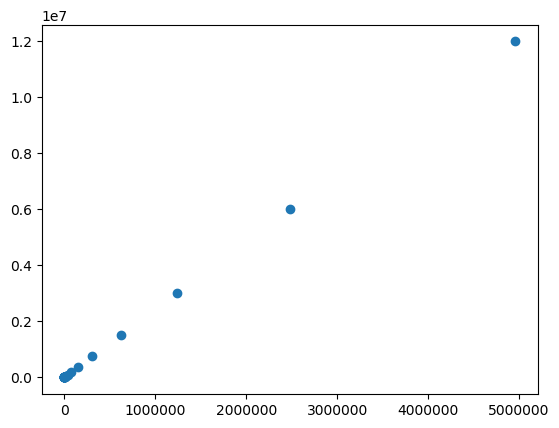

2-element Array{Float64,1}:
 4.95799e6
 1.19995e7

In [108]:
v=rand(2) #[1.0; 0.2]

Q=zeros(2,25)
Q[:,1]=v

for k=2:size(Q,2)
    v=A*v
    Q[:,k]=v
end


using PyPlot

scatter(Q[1,:], Q[2,:])


display(Q)

Q[:,end]

2×65 Array{Float64,2}:
 0.478971  0.968467  1.95714  3.95308  …  2.76728e18  5.53841e18  1.10842e19
 0.807859  1.59993   3.16955  6.28091     2.88798e18  5.77017e18  1.15292e19

2×65 Array{Float64,2}:
 0.0656862  0.150563  0.33797  …  1.32112e18  2.64929e18  5.3121e18 
 0.665378   1.30197   2.54867     1.54122e18  3.07187e18  6.12345e18

1×65 RowVector{Float64,Array{Float64,1}}:
 1.95998  1.96134  1.9627  1.96406  …  1.99822  1.99831  1.99839  1.99847

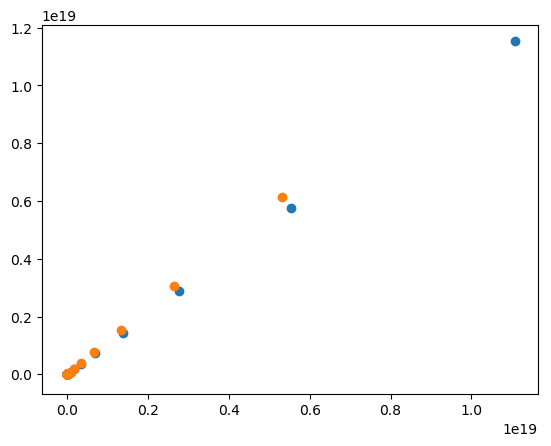

In [122]:
P=[ 1.0 1.0; -1.0 1.5]'
S=[2.0 0.0; 0.0 2.0-0.08]

A=P*S*P^(-1)

v=rand(2) 

Q=zeros(2,65)
Q[:,1]=v

for k=2:size(Q,2)
    v=A*v
    Q[:,k]=v
end

display(Q)

using PyPlot

scatter(Q[1,:], Q[2,:])

v=rand(2) 

Q=zeros(2,65)
Q[:,1]=v

λ=zeros(size(Q,2))
λ[1]=(v'A*v)/(v'*v)

for k=2:size(Q,2)
    v=A*v
    Q[:,k]=v
    
    λ[k]=(v'A*v)/(v'*v)
end

scatter(Q[1,:], Q[2,:])

display(Q)
display(λ')

2×50 Array{Float64,2}:
 0.547404  0.110436  0.0219917  0.00440789  …  1.54977e-34  3.09953e-35
 0.555364  0.10964   0.0220713  0.00439993     1.54977e-34  3.09953e-35

2×50 Array{Float64,2}:
 0.547404  0.110436  0.0219917  0.00440789  …  1.54977e-34  3.09953e-35
 0.555364  0.10964   0.0220713  0.00439993     1.54977e-34  3.09953e-35

1×50 RowVector{Float64,Array{Float64,1}}:
 0.199551  0.200213  0.199891  0.200054  …  0.2  0.2  0.2  0.2  0.2  0.2  0.2

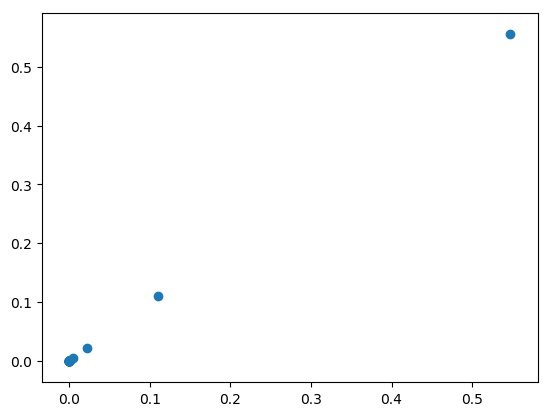

In [52]:
P=[ 1.0 1.0; -1.0 1.5]'
S=[2.0 0.0; 0.0 -1.0]/10.0

A=P*S*P^(-1)

v=rand(2) 

Q=zeros(2,50)
Q[:,1]=v

λ=zeros(size(Q,2))
λ[1]=(v'A*v)/(v'*v)

for k=2:size(Q,2)
    v=A*v
    Q[:,k]=v
    
    λ[k]=(v'A*v)/(v'*v)

end

display(Q)

using PyPlot

scatter(Q[1,:], Q[2,:])

display(Q)
display(λ')

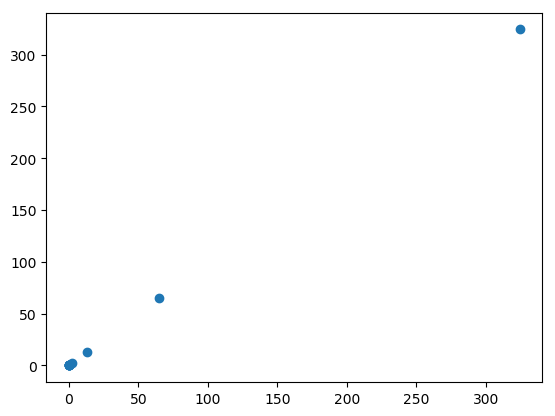

PyObject <matplotlib.collections.PathCollection object at 0x13ec0b250>

In [42]:
scatter(Q[1,40:50]*1e30, Q[2,40:50]*1e30)

### Observations:

* The iterations produces vectors whose magnitude either blows up or converge to 0, **but the direction at which they point to seem to converge**.
* This convergence seems to be independent of the initial vector that we put in. (There could be exceptions. What?)
* This direction seems to correspond to the direction that corresponds to the **dominating Eigenvalue of $A$**.
* The efficiency of the iteration depends on the ratio between the largest (in amplitude) and the second largest eigenvalues of $A$.
* This method will not work for complex Eigenvalues.

## Inverse power iterations

Inverse power method is the power method but with $A^{-1}$ instead of $A$.

In [128]:
P=[ 1.0 1.0 0.0; -1.0 1.5 1.0; 0.1 0.0 1.0]'
S=[0.012 0.0 0.0; 0.0 -0.015 0.0; 0.0 0.0 10.0]

A=P*S*P^(-1)
v=rand(3) 

Q=zeros(3,35)
Q[:,1]=v

λ=zeros(size(Q,2))
λ[1]=(v'A*v)/(v'*v)

for k=2:size(Q,2)
    v=A\v
    Q[:,k]=v
    λ[k]=(v'A*v)/(v'*v)
end

#display(Q)
display(λ')

using PyPlot

#scatter(Q[1,:], Q[2,:])

1×35 RowVector{Float64,Array{Float64,1}}:
 1.4347  0.0123787  0.0116577  0.0121569  …  0.0119997  0.0120003  0.0119998

### Observations:

* The inverse power iterations produces vectors whose magnitude either blows up or converge to 0, **but the direction at which they point to seem to converge**.
* This convergence seems to be independent of the initial vector that we put in. (There could be exceptions. What?)
* This direction seems to correspond to the direction that corresponds to the **Eigenvalue of $A$ with the smallest amplitude**.

### Rayleigh quotient

$$ R(A,v):=\frac{v^\top Av}{v^\top v} $$

**Theorem**: the convergence of power method
$$ R(A,v_k)=\lambda_1+\mathcal{O}(\left|\frac{\lambda_2}{\lambda_1}\right|^k) $$

## The shifted inverse power iterations

In [137]:
P=[ 1.0 1.0 0.0; -1.0 1.5 1.0; 0.1 0.0 1.0]'
S=[0.012 0.0 0.0; 0.0 -0.015 0.0; 0.0 0.0 10.0]

A=P*S*P^(-1)

μ= 0.0119
A_=A-μ*eye(3,3)

v=rand(3) 

Q=zeros(3,15)
Q[:,1]=v

λ=zeros(size(Q,2))
λ[1]=(v'A*v)/(v'*v)

for k=2:size(Q,2)
    v=A_\v
    Q[:,k]=v
    λ[k]=(v'A_*v)/(v'*v)
end

#display(Q)
display(λ')

1×15 RowVector{Float64,Array{Float64,1}}:
 0.939375  0.000100503  0.000100006  …  0.0001  0.0001  0.0001  0.0001

## Orthogonal iterations

Start with two orthogonal vectors $x_0$ and $y_0$, and update by

$x_{k+1}:=Ax_k$ and $y_{k+1}=Ax_k-c_k x_{k+1}$ such that $x_{k+1}\perp y_{k+1}=0$.

Orthogonalization can be done by qr().

In [144]:
P=[ 1.0 1.0; -1.0 1.5]'
S=[2.0 0.0; 0.0 -1.59]

A=P*S*P^(-1)

x=rand(2)
y=rand(2)

c=y'*x/(x'*x)
y-=c*x


for k=2:125
    x=A*x
    y=A*y
    c=y'*x/(x'*x)
    y-=c*x
end

[(x'A*x)/(x'*x), (y'A*y)/(y'*y)]

2-element Array{Float64,1}:
  2.0 
 -1.59

In [148]:
P=[ 1.0 1.0 1.0; -1.0 1.5 0.0; 0.1 1.0 0.5]'
S=[2.0 0.0 0.0; 0.0 -0.015 0.0; 0.0 0.0 0.9]

A=P*S*P^(-1)
x=rand(3)
y=rand(3)

Q=zeros(3,15)
Q[:,1]=v


for k=2:size(Q,2)
    x=A*x
    y=A*y
    c=y'*x/(x'*x)
    y-=c*x
end


display([(x'A*x)/(x'*x), (y'A*y)/(y'*y)])

Uk=[x/norm(x) y/norm(y)]

2-element Array{Float64,1}:
 2.00002
 0.89998

2×2 Array{Float64,2}:
  2.00002     1.59342
 -1.37176e-5  0.89998

#### Orthogonal iterations

Write the iterations into: $AU_k=U_{k+1}R_{k+1}$ and define the "orthogonal Iteration" algorithm as

1. $Z_k:= AU_{k-1}$
2. QR factorization of $Z_k$: $U_k, R_k = qr(Z_k)$

In [146]:
U=[ rand(3) rand(3) rand(3)]
R=copy(U)

for k=1:10
    U,R=qr(A*U)
end

display(R)

3×3 Array{Float64,2}:
 2.00106  -1.59237    24.8594
 0.0       0.899524  -17.9539
 0.0       0.0        -0.015 

### Schur decomposition

Let $U_k\rightarrow U$, where $U_k$ are constructed by the orthogonal iterations.

The Schur decompoistion of $A$ is $U^\top AU$.

## Application: approximate roots of a polynomial

Approximate the roots by calculating eigenvalues of a  _companion matrix_.    

Give a polynomial 

$$p(z) = \sum_{k=1}^n c_k z^{k-1} + z^n,$$

the companion matrix is defined as the $n \times n$ matrix

$$C = \begin{pmatrix} 0 & 1 \cr && 1 \cr &&& \ddots \cr &&&& 1 \cr -c_1 & -c_2 & -c_3 & \cdots & -c_n\end{pmatrix}$$

The eigenvalues of $C$ are the roots of $p(z) = 0$.  

Let $\lambda$ be a root of $p(z)$, then $\lambda^n = - \sum_{k=1}^n c_k \lambda^{k-1}$

Observe that

$$\mathbf v \triangleq \begin{pmatrix} 1 \cr \lambda \cr \lambda^2 \cr \vdots \cr \lambda^{n-1}\end{pmatrix}$$

$$C \mathbf v = \begin{pmatrix} \lambda \cr \lambda^2 \cr \vdots \cr \lambda^{n-1} \cr -c_1 -c_2 \lambda -\cdots - c_n \lambda^{n-1} \end{pmatrix} = \begin{pmatrix} \lambda \cr \lambda^2 \cr \vdots \cr \lambda^{n-1} \cr \lambda^n\end{pmatrix} = \lambda \mathbf v$$

As an example, Consider the following quintic polynomial:

$$z^6-2z^5 +z^4 - 3z^3 +z^2-7z+10 = 0$$

This leads to the companion matrix:

In [56]:
c=[10,0,1,-3,1, -2]
n=length(c)
C=zeros(n,n)
for k=1:n-1
    C[k,k+1]=1
end
C[end,:]=-c
C

6×6 Array{Float64,2}:
   0.0  1.0   0.0  0.0   0.0  0.0
   0.0  0.0   1.0  0.0   0.0  0.0
   0.0  0.0   0.0  1.0   0.0  0.0
   0.0  0.0   0.0  0.0   1.0  0.0
   0.0  0.0   0.0  0.0   0.0  1.0
 -10.0  0.0  -1.0  3.0  -1.0  2.0

In [57]:
λ=eigvals(C)

6-element Array{Complex{Float64},1}:
   1.76402+0.247737im
   1.76402-0.247737im
  0.115978+1.47236im 
  0.115978-1.47236im 
 -0.879995+0.818763im
 -0.879995-0.818763im

In [71]:
U=rand(size(C))
A=copy(C)
for k=1:120
    U,R=qr(A*U)
end

In [72]:
B=U'A*U

display(B)


6×6 Array{Float64,2}:
  1.96034      -2.23207       1.72243       5.14532       3.36501   -6.25633 
  0.0447648     1.56769      -0.75224      -2.23519      -1.39976    2.69733 
  1.39204e-8    3.54156e-7    0.436732      2.08303       1.02621   -1.9221  
 -5.46988e-11   3.37991e-7   -1.09011      -0.204776     -0.271297   0.494566
 -6.93889e-17   1.73472e-16   5.82588e-11  -5.37305e-11  -0.898391   1.13474 
  2.77556e-17  -6.48787e-16   4.0182e-11   -1.61403e-11  -0.59107   -0.861599

The eigenvalues of the diagonal blocks which are at most `2x2` (a solveable problem!) are very close to the roots:

In [73]:
λk=[eigvals(B[1:2,1:2]); eigvals(B[3:4,3:4]); eigvals(B[5:6,5:6])]

display(λk)
norm(λ-λk)

6-element Array{Complex{Float64},1}:
   1.76402+0.247738im
   1.76402-0.247738im
  0.115978+1.47236im 
  0.115978-1.47236im 
 -0.879995+0.818763im
 -0.879995-0.818763im

4.486818319295191e-7